# PROBLEM STATEMENT
`The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.` 

# DATASET INFORMATION
`Flight booking price prediction dataset contains around 3 lacs records with 11 attributes` 

In [1]:
# Importing the libraries
# We start of this project by importing all the necessary libraries that will be required for thr process

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


- **`Removing unnecessary column from the dataframe`**

In [3]:
df =df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


- **`Checking the shape of a dataframe and dtypes of all columns along with calculating the statistical data.`**

In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**Missing Value**
- `Checking out the missing values in a dataframe`

In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Data Visualization

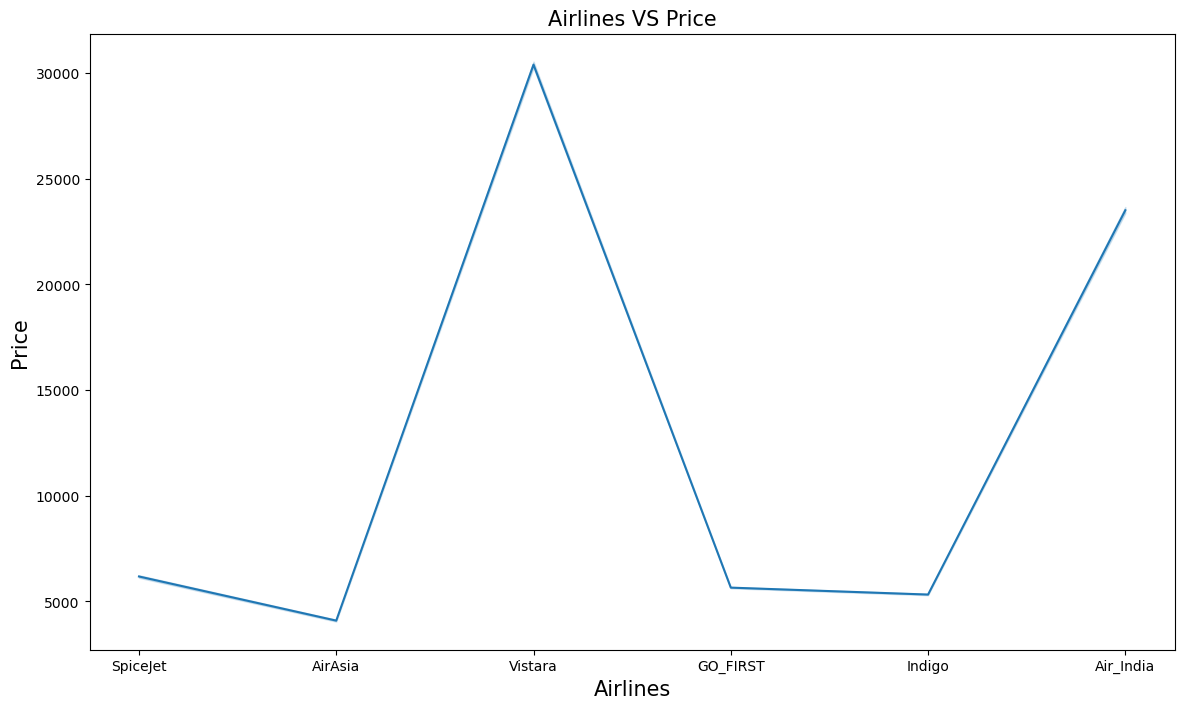

In [8]:
plt.figure(figsize=(14,8))
sns.lineplot(x= df['airline'],y=df['price'])
plt.title("Airlines VS Price",fontsize=15)
plt.xlabel("Airlines",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()


**There is a variation in price with different airlines**


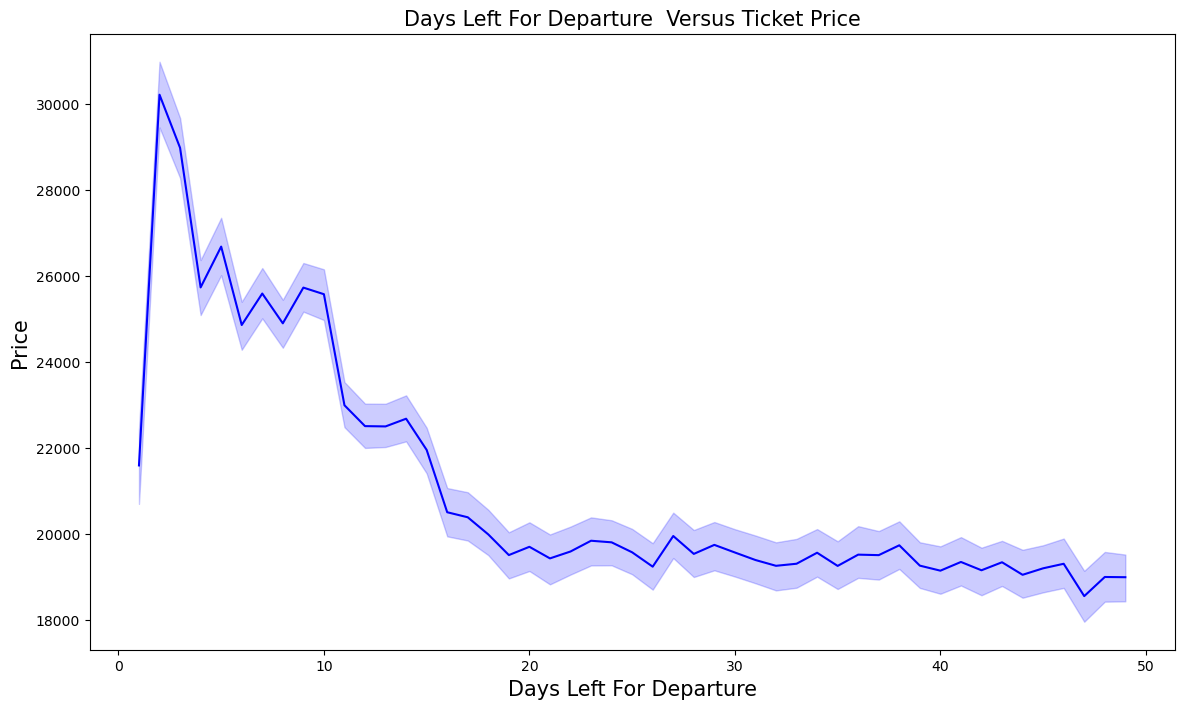

In [9]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='days_left',y =df['price'],color='blue')
plt.title("Days Left For Departure  Versus Ticket Price",fontsize=15)
plt.xlabel("Days Left For Departure",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

**The price of the ticket increases as the days left for departure decreases**

C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\2409554945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='airline',y='price',palette="dark")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\2409554945.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


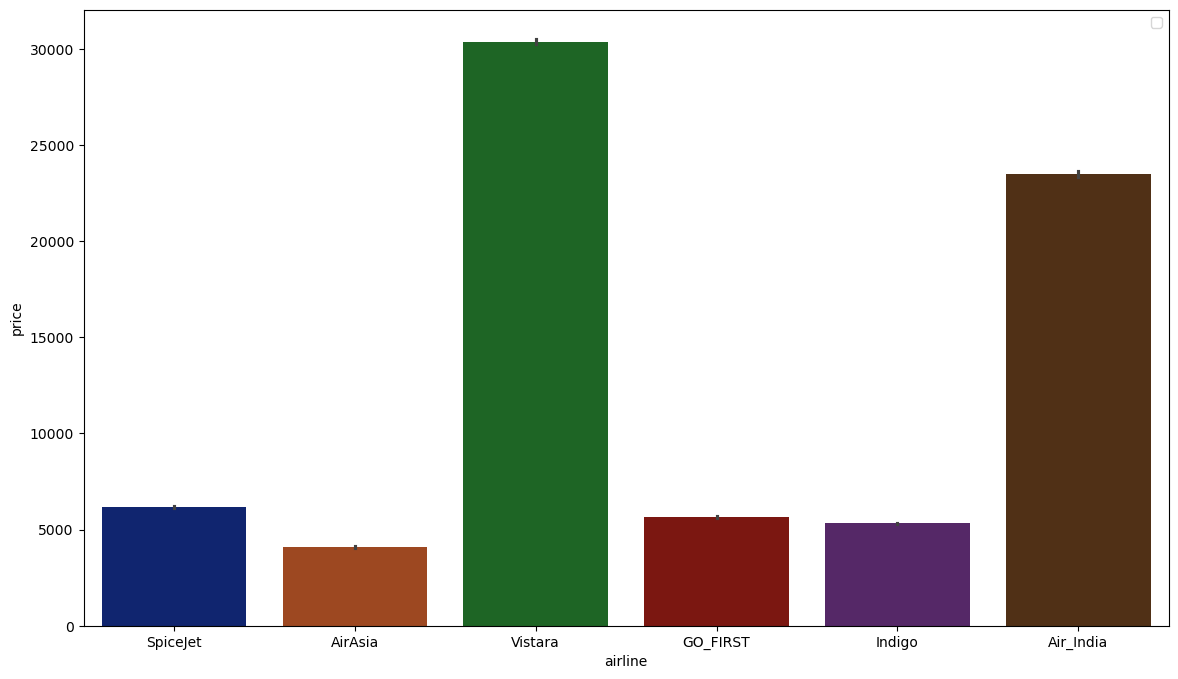

In [10]:
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='airline',y='price',palette="dark")
plt.legend()
plt.show()

**Price range of all the flights**

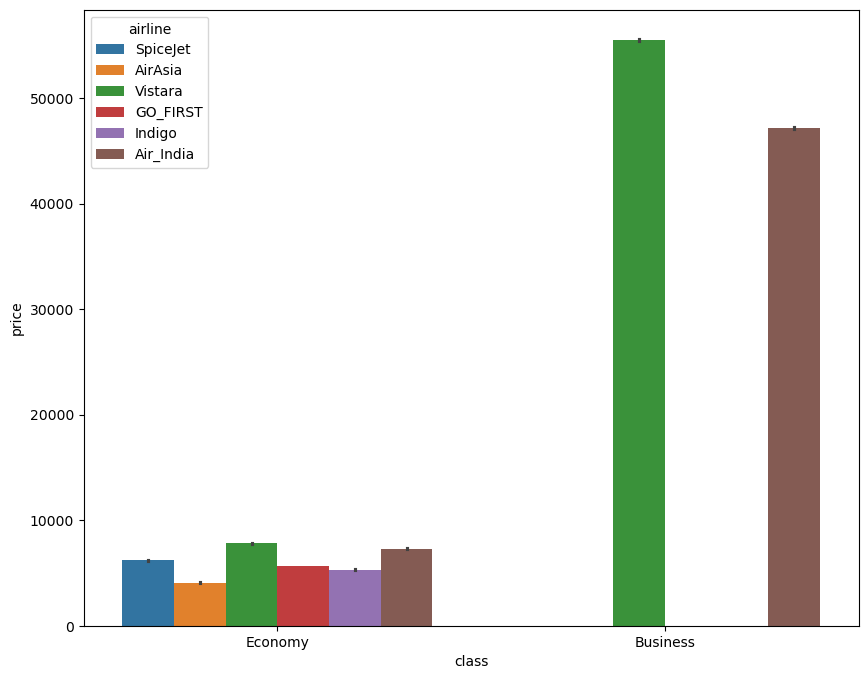

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='class',y='price',hue='airline')
plt.show()

**Range of price of all the flights of Economy and Business class**

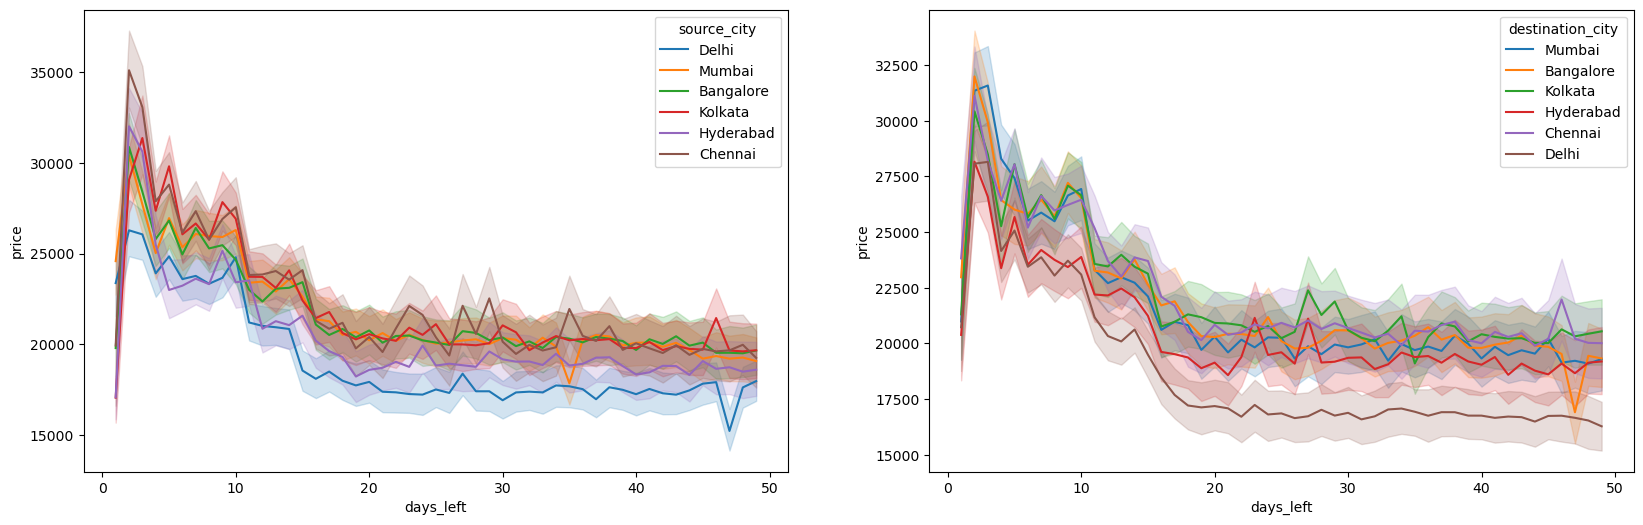

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
sns.lineplot(data=df,x='days_left',y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=df,x='days_left',y='price',hue='destination_city',ax=ax[1])
plt.show()

**Range of price of flights which source and destination city according to the days left**

C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\796071948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['airline'],data=df,palette="bright")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\796071948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['source_city'],data=df,palette="bright")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\796071948.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['departure_time'],data=df,palette="bright")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\796071948.py:16: 

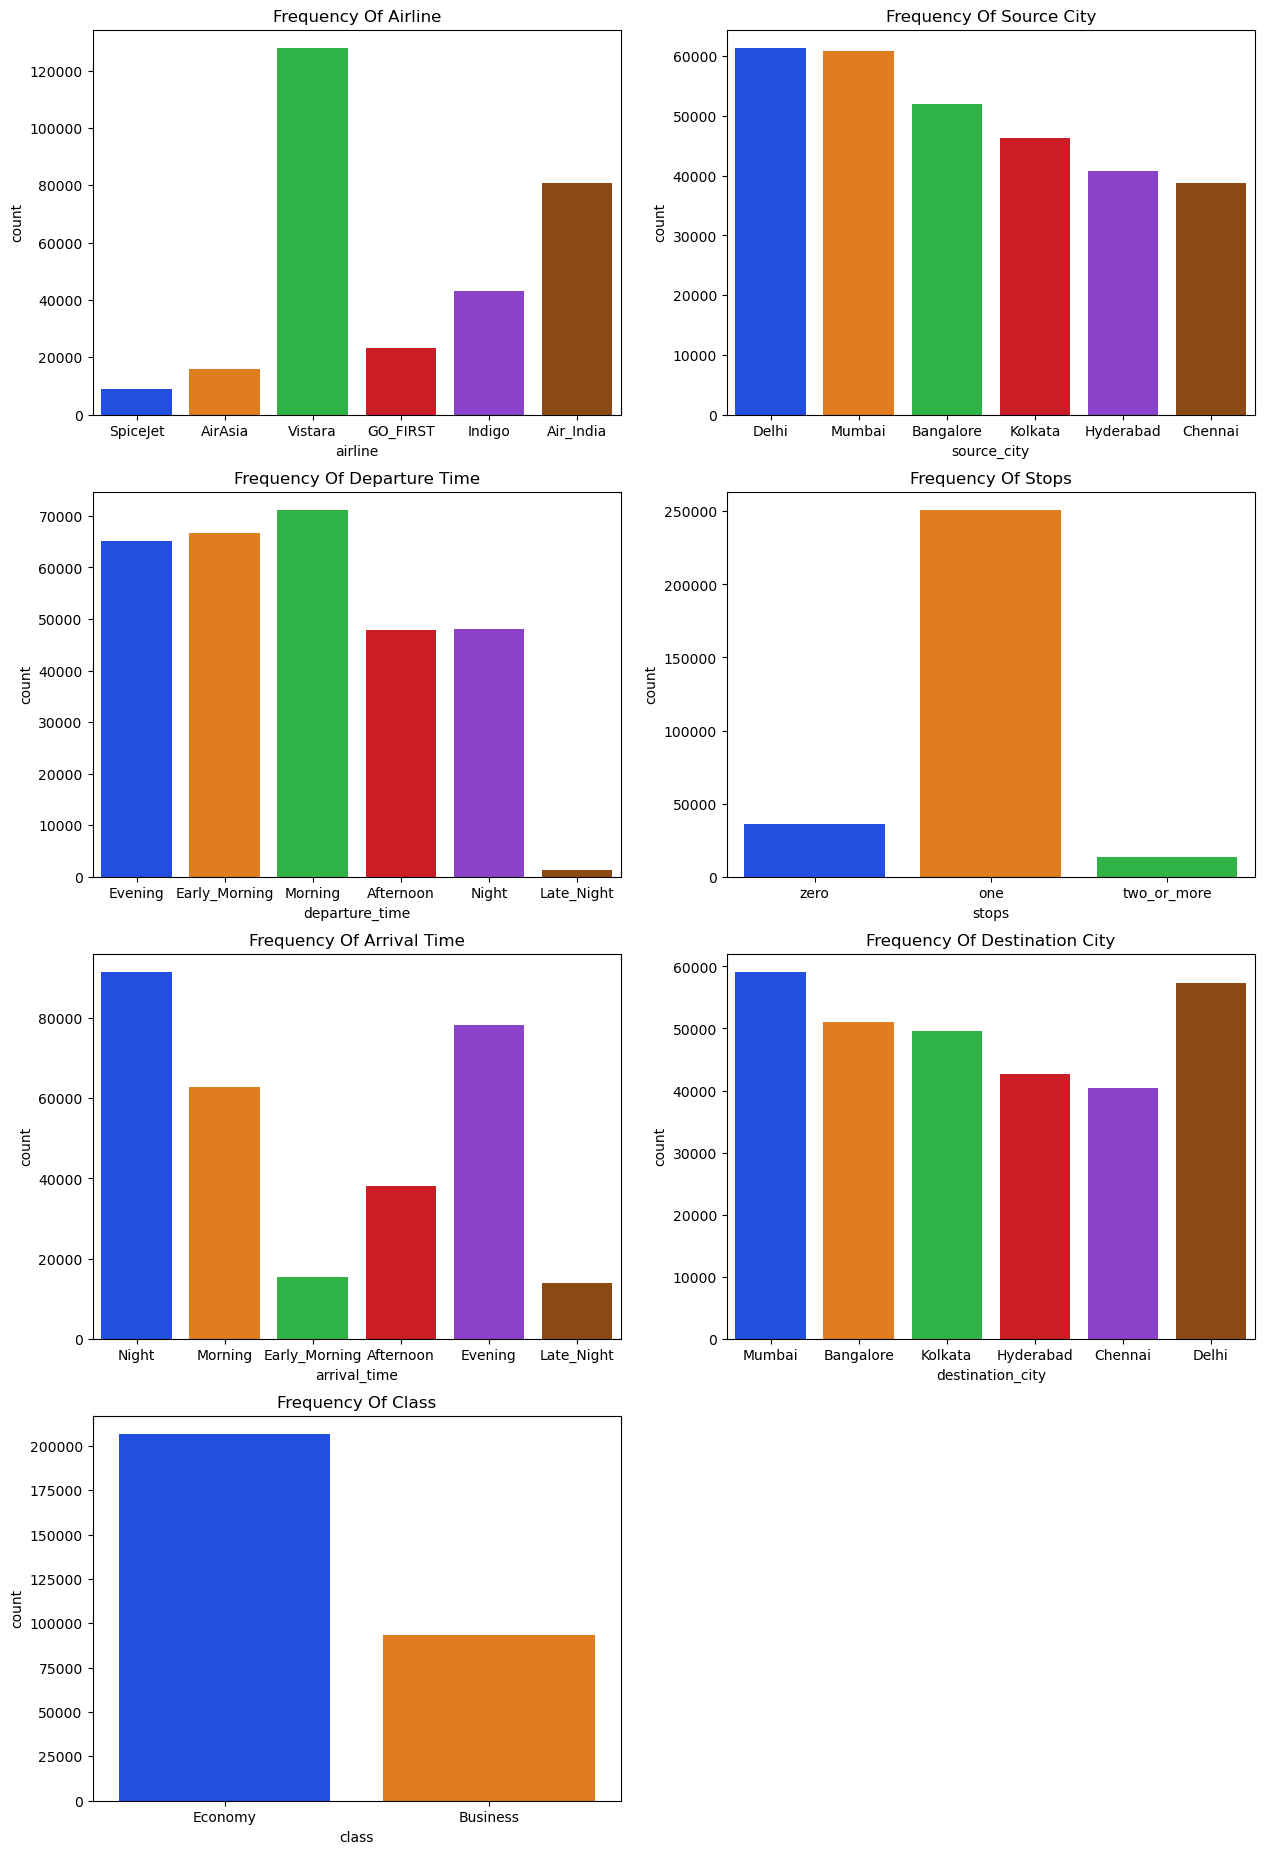

In [13]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df,palette="bright")
plt.title("Frequency Of Airline")

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df,palette="bright")
plt.title("Frequency Of Source City")

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df,palette="bright")
plt.title("Frequency Of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df,palette="bright")
plt.title("Frequency Of Stops")

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df,palette="bright")
plt.title("Frequency Of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df,palette="bright")
plt.title("Frequency Of Destination City")

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df,palette="bright")
plt.title("Frequency Of Class")

plt.show()

**Visualization of categorical feature with countplot**

# LABEL ENCODING
**`Performing One Hot Encoding For Categorical feature Of A DataFrame`**

In [14]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

df['airline'] =le.fit_transform(df['airline'])
df['flight'] =le.fit_transform(df['flight'])
df['source_city'] =le.fit_transform(df['source_city'])
df['departure_time'] =le.fit_transform(df['departure_time'])
df['stops'] =le.fit_transform(df['stops'])
df['arrival_time'] =le.fit_transform(df['arrival_time'])
df['destination_city'] =le.fit_transform(df['destination_city'])
df['class']= le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


# FEATURE SELECTION

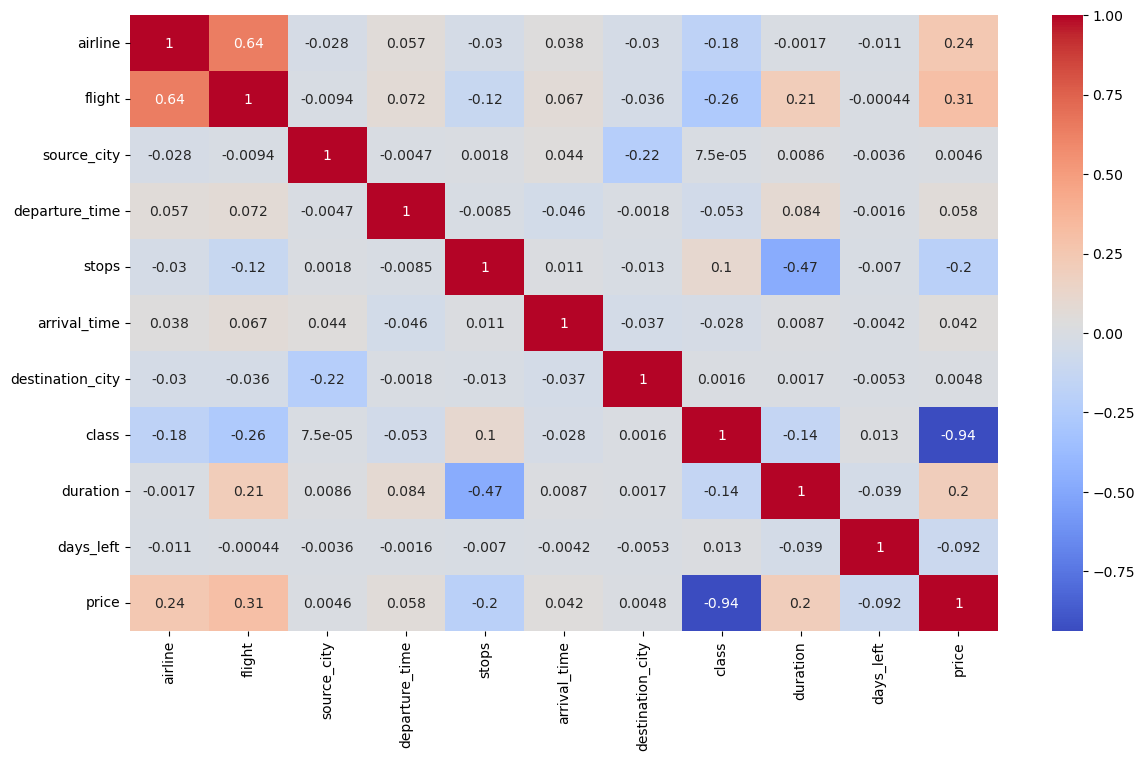

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Plotting the correlation graph to see the correlation between feature and dependent variable**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list =[]
for col in df.columns:
    if((df[col].dtype !='object') & (col != 'price') ):
        col_list.append(col)

X =df[col_list]
vif_data =pd.DataFrame()
vif_data['feature'] =X.columns
vif_data['VIF'] =[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


**Selecting the feature using VIF.VIF should be less than 5.So drop the airline and flight feature**

In [18]:
df =df.drop(columns=['airline'])
df =df.drop(columns=['flight'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list =[]
for col in df.columns:
    if ((df[col].dtype !='object') &(col !='price')):
        col_list.append(col)

X =df[col_list]
vif_data =pd.DataFrame()
vif_data['feature'] =X.columns
vif_data['VIF'] =[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0       source_city  2.886348
1    departure_time  2.703722
2             stops  1.416900
3      arrival_time  3.543356
4  destination_city  2.832829
5             class  2.848124
6          duration  4.004208
7         days_left  3.861337


**All feature are hiving VIF less than 5**

# LINEAR REGRESSION

**Applying standardization and implementing Linear Regression Model to predict the price of a flight**

In [27]:
X =df.drop(columns=['price'])
y =df['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
difference =pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted Value"])
difference


,Actual_Value,Predicted Value
0,7366.0,6283.435963
1,64831.0,51542.040632
2,6195.0,6095.660441
3,60160.0,55045.989157
4,6578.0,8488.506438
...,...,...
60026,5026.0,7465.352974
60027,3001.0,362.752670
60028,6734.0,7734.018745
60029,5082.0,-1795.410786


# Calculating r2 score,MAE, MAPE, MSE, RMSE.

In [31]:
from sklearn.metrics import r2_score
r2_score =r2_score(y_test,y_pred)
print("R2 Score:",r2_score)
from sklearn import metrics
mean_abs_error =metrics.mean_absolute_error(y_test,y_pred)
print("mean absolute error:",mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error =mean_absolute_percentage_error(y_test,y_pred)
print("mean absolute percentage error:",mean_absolute_percentage_error)

mean_sq_error =metrics.mean_squared_error(y_test,y_pred)
print("mean squared error:",mean_sq_error)

root_mean_sq_error =np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",root_mean_sq_error)
                            

R2 Score: 0.8988522951472385
mean absolute error: 4716.119193444017
mean absolute percentage error: 0.4436666239104555
mean squared error: 52139848.863774784
root mean squared error: 7220.792814073451


 **Root Mean square error(RMSE) of the Linear regression model is 7220.79 and Mean absolute percentage error(MAPE) is 44 percent. Lower the RMSE and MAPE better the model**

#### Plotting the graph of actual and predicted of flight

C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


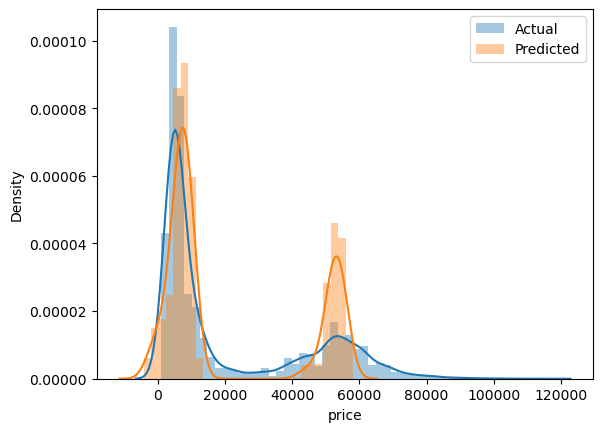

In [32]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

# DECISION TREE REGRESSOR

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt =DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred =dt.predict(X_test)

from sklearn.metrics import r2_score
r2_score =r2_score(y_test,y_pred)
print("R2 score:",r2_score)

from sklearn.metrics import mean_absolute_error
mean_abs_error =mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error =mean_absolute_percentage_error(y_test,y_pred*100)
print("Mean absolute percentage error:",mean_absolute_percentage_error)

from sklearn.metrics import mean_squared_error
mean_sq_error =mean_squared_error(y_test,y_pred)
print("Mean squared error:",mean_sq_error)

from sklearn.metrics import root_mean_squared_error
root_mean_sq_error =np.sqrt(root_mean_squared_error(y_test,y_pred))
print("Root mean square error:",root_mean_sq_error)
                            

R2 score: 0.9653281149743835
Mean absolute error: 1534.2677541603505
Mean absolute percentage error: 101.66184546585417
Mean squared error: 17872742.121923324
Root mean square error: 65.02012458177941


**RMSE is 6502 which is less then linear regression model**

#### Plotting the graph of actual and predicted price of flight 

C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


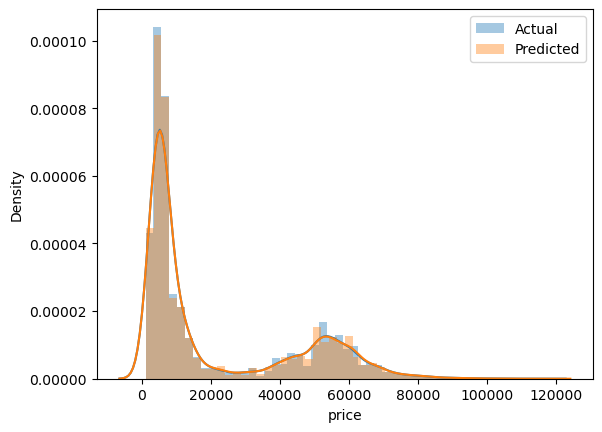

In [37]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

# RANDOM FOREST REGRESSOR

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score =r2_score(y_test,y_pred)
print("R2 score:",r2_score)

from sklearn.metrics import mean_absolute_error
mean_abs_error =mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
mean_ab_percentage_error =mean_absolute_percentage_error(y_test,y_pred)
print("Mean absolute percentage error:",mean_ab_percentage_error)

from sklearn.metrics import mean_squared_error
mean_sq_error =mean_squared_error(y_test,y_pred)
print("Mean squared error:",mean_sq_error)

from sklearn.metrics import root_mean_squared_error
root_mean_sq_error =np.sqrt(root_mean_squared_error(y_test,y_pred))
print("Root mean squared error:",root_mean_sq_error)
                            

R2 score: 0.9781328528767143
Mean absolute error: 1404.4375914481188
Mean absolute percentage error: 0.0989690887557812
Mean squared error: 11272126.715576379
Root mean squared error: 57.94306517596306


**RMSE is 5794 which is less than the linear regression and decision tree model**

#### Plotting the graph of actual and predicted price of flight 

C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\ubaid\AppData\Local\Temp\ipykernel_28712\326679581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


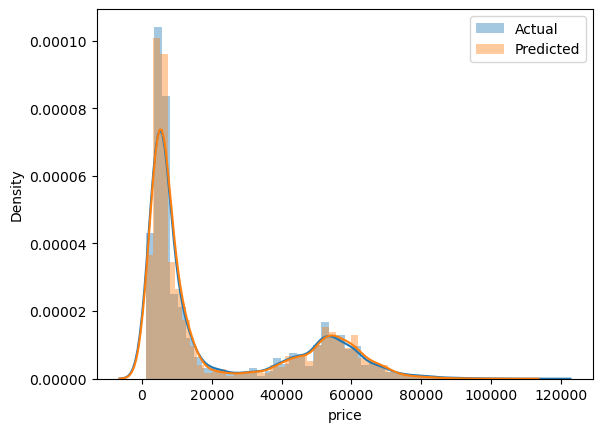

In [40]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()